In [1]:
import datamanager
import torch
import pathlib

config = datamanager.HyFluidNeRFDataManagerConfig(dataparser=datamanager.HyFluidDataParserConfig())
config.dataparser.data = pathlib.Path("../data/ScalarReal")
manager: datamanager.HyFluidNeRFDataManager = config.setup(device=torch.device("cuda"))

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Caching all 480 images.

Output()

Caching all 120 images.

Output()

In [16]:
import copy
manager.train_count += 1
image_batch = next(manager.iter_train_image_dataloader)
batch = manager.train_pixel_sampler.sample(image_batch)
batch_copy = copy.deepcopy(batch)
all_frames = manager.train_dataset.metadata['all_frames']
datamanager.perturb_frames_sample(image_batch, all_frames, batch)

In [18]:
torch.max(torch.norm(batch_copy['image'] - batch['image'], dim=1))

tensor(0.1925)

In [11]:
batch_copy['indices']

tensor([[ 212, 1133,  543],
        [ 213,  732,  375],
        [ 177, 1250,  612],
        ...,
        [  88,  768,  519],
        [ 253, 1233,  390],
        [ 304,  910, 1027]])

In [10]:
batch['indices']

tensor([[ 212.2123, 1133.0000,  543.0000],
        [ 212.9226,  732.0000,  375.0000],
        [ 177.2008, 1250.0000,  612.0000],
        ...,
        [  87.7497,  768.0000,  519.0000],
        [ 253.1201, 1233.0000,  390.0000],
        [ 304.3980,  910.0000, 1027.0000]])

torch.Size([480])
torch.Size([480, 1920, 1080, 3])
sample image: 272
sample shape: torch.Size([1920, 1080, 3])
sample_flat shape: torch.Size([2073600, 3])
sample_idx shape: torch.Size([1920, 1080, 3])
sample_idx_flat shape: torch.Size([2073600, 3])


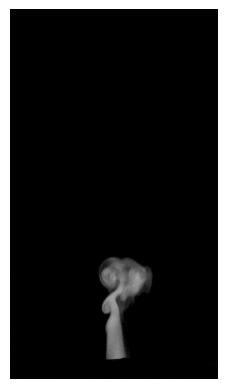

In [32]:
from matplotlib import pyplot as plt

print(image_batch['image_idx'].shape)
print(image_batch['image'].shape)

sample = image_batch['image'][0]
height, width, channels = sample.shape
sample_idx = torch.zeros((height, width, channels))
sample_idx[..., 0] = image_batch['image_idx'][0]
sample_idx[..., 1] = torch.arange(height).view(-1, 1).expand(-1, width)
sample_idx[..., 2] = torch.arange(width).expand(height, -1)

plt.imshow(sample)
plt.axis('off')

sample_flat = sample.reshape(-1, 3)
sample_idx_flat = sample_idx.reshape(-1, 3)
print(f'sample image: {image_batch["image_idx"][0]}')
print(f'sample shape: {sample.shape}')
print(f'sample_flat shape: {sample_flat.shape}')
print(f'sample_idx shape: {sample_idx.shape}')
print(f'sample_idx_flat shape: {sample_idx_flat.shape}')

In [36]:
batch = {'image': sample_flat, 'indices': sample_idx_flat}
datamanager.perturb_frames(batch, all_frames)

torch.Size([1024, 3])
torch.Size([1024, 3])
